In [1]:
import numpy as np
import pandas as pd
import os

## Residual Network or ResNet ##

ResNet is a groundbreaking deep learning architecture introduced in 2015 by Kaiming He and colleagues. It revolutionized image recognition by enabling the training of very deep neural networks—sometimes hundreds or even thousands of layers—without suffering from the vanishing gradient problem.

ResNet uses skip connections (also called shortcut connections) that allow the input of a layer to bypass one or more layers and be added directly to the output.

Instead of learning the full transformation, each block learns the residual—the difference between the input and the desired output.

This makes it easier for the network to learn identity mappings and improves gradient flow during training.

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
train_dir = "../input/fingers/train"
test_dir = "../input/fingers/test"
img_size = (128, 128)

def load_images_and_labels(directory):
    images = []
    labels = []
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        img = Image.open(file_path).resize(img_size)
        images.append(np.array(img))
        label_part = file.split('_')[1]  
        label = file.split('_')[-1].split('.')[0]       
        labels.append(label)
    return np.array(images), np.array(labels)


X_train, Y_train = load_images_and_labels(train_dir)
X_test, Y_test = load_images_and_labels(test_dir)

print(Y_train[0])
print(f"Train images: {X_train.shape}, Train labels: {Y_train.shape}")
print(f"Test images: {X_test.shape}, Test labels: {Y_test.shape}")


4R
Train images: (18000, 128, 128), Train labels: (18000,)
Test images: (3600, 128, 128), Test labels: (3600,)


In [4]:
unique_classes = np.unique(Y_train)
print("Unique classes:", unique_classes)

Unique classes: ['0L' '0R' '1L' '1R' '2L' '2R' '3L' '3R' '4L' '4R' '5L' '5R']


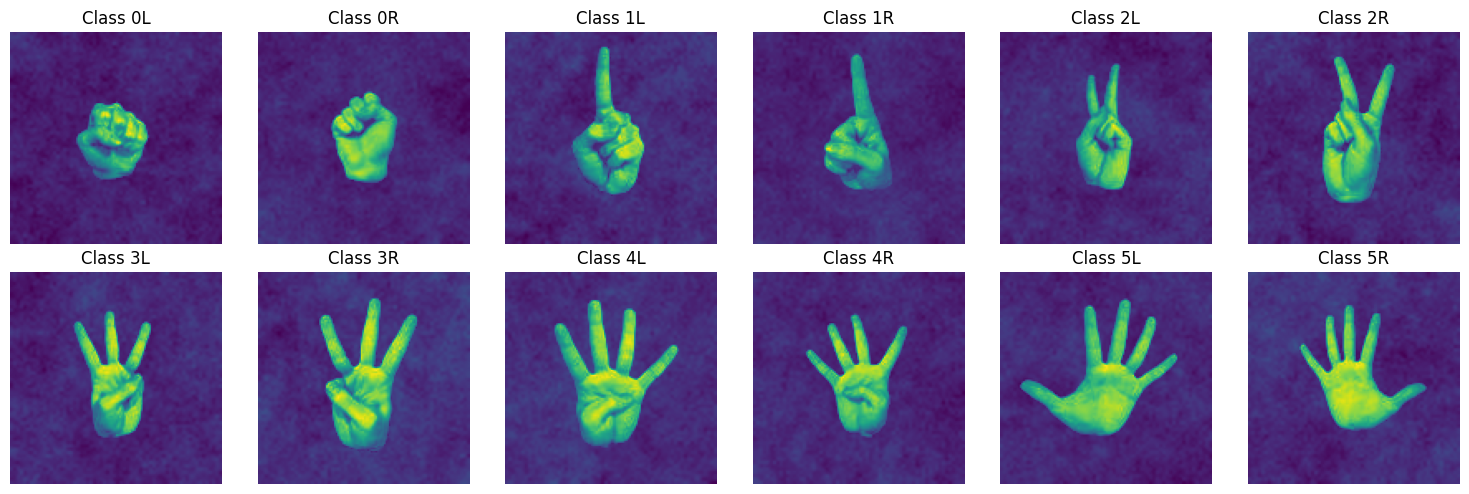

In [5]:
unique_classes = np.unique(Y_train)

plt.figure(figsize=(15, 5))

for i, cls in enumerate(unique_classes):
    idx = np.where(Y_train == cls)[0][0]
    
    plt.subplot(2, 6, i + 1)
    plt.imshow(X_train[idx])
    plt.title(f"Class {cls}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
X_train = X_train.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

In [7]:
from sklearn.model_selection import train_test_split
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [8]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 14400
number of test examples = 3600
X_train shape: (14400, 128, 128, 1)
Y_train shape: (14400,)
X_test shape: (3600, 128, 128, 1)
Y_test shape: (3600,)


In [9]:
label_map = {
    '0L': 0, '0R': 1,
    '1L': 2, '1R': 3,
    '2L': 4, '2R': 5,
    '3L': 6, '3R': 7,
    '4L': 8, '4R': 9,
    '5L': 10, '5R': 11
}

In [10]:
Y_train_int = np.array([label_map[label] for label in Y_train])
Y_test_int = np.array([label_map[label] for label in Y_test])


In [11]:
from tensorflow.keras.utils import to_categorical

Y_train_encoded = to_categorical(Y_train_int, num_classes=12)
Y_test_encoded = to_categorical(Y_test_int, num_classes=12)

2025-08-13 19:18:13.485474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755112693.741599      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755112693.815835      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
